# Задание 1
Попробовать решить задачу регресии для набора данных по пауэрлифитингу, но для женщин ( df[df['Sex'] =='F'] ) и попробовать выбрать иные целевые переменные из "BodyweightKg", "Age", "Equipment", "Tested", "bench", 'deadlift', 'squat'.

Для каждой целевой переменной посчитать метрики MAE, MAPE, MSE, RMSE, R2.

Строить регрессию как на всех данных целиком с помощью statsmodels, так и с помощью кросс-валидации и пакета sklearn (встроенная модель LinearRegression) (попробовать оба варианта)

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv("openpowerlifting.csv")
df.head()

C:\Users\alexander\AppData\Local\Temp\ipykernel_42928\699866218.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("openpowerlifting.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [5]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [6]:
df.shape

(1423354, 37)

# Препроцессинг

Рассматривается только соревнования для женщин

In [7]:
df = df[df['Sex'] =='F']

In [8]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363165 entries, 0 to 1423248
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             363165 non-null  object 
 1   Sex              363165 non-null  object 
 2   Event            363165 non-null  object 
 3   Equipment        363165 non-null  object 
 4   Age              192760 non-null  float64
 5   AgeClass         197836 non-null  object 
 6   Division         361453 non-null  object 
 7   BodyweightKg     359054 non-null  float64
 8   WeightClassKg    359446 non-null  object 
 9   Squat1Kg         98473 non-null   float64
 10  Squat2Kg         97802 non-null   float64
 11  Squat3Kg         96605 non-null   float64
 12  Squat4Kg         1472 non-null    float64
 13  Best3SquatKg     285627 non-null  float64
 14  Bench1Kg         128380 non-null  float64
 15  Bench2Kg         127525 non-null  float64
 16  Bench3Kg         125733 non-null  flo

In [10]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,192760.000000,359054.000000,98473.000000,97802.000000,96605.000000,1472.000000,285627.000000,128380.000000,127525.000000,125733.000000,...,105365.000000,104162.000000,101980.000000,3715.000000,299340.000000,339048.000000,337032.000000,337021.000000,337032.000000,328631.000000
mean,30.624624,68.007905,76.506435,62.824510,22.572693,61.885367,113.722239,50.263324,34.083361,-8.843100,...,112.830098,98.115674,29.021149,75.514654,126.869407,264.442652,277.620578,284.505794,244.499947,473.405516
std,12.445009,17.644408,85.724741,104.888779,125.316199,127.274818,36.574329,47.173330,65.392049,76.394292,...,57.086848,93.860712,139.187515,125.477123,31.478235,110.860405,111.442054,113.651099,98.399426,110.598600
min,0.500000,15.880000,-365.000000,-453.600000,-453.600000,-300.000000,-252.500000,-240.000000,-453.600000,-575.000000,...,-300.000000,-282.500000,-305.000000,-263.000000,-190.000000,7.480000,10.150000,10.150000,8.950000,13.960000
25%,21.000000,55.700000,70.000000,60.000000,-110.000000,-68.125000,90.000000,42.500000,25.000000,-70.000000,...,100.000000,100.000000,-130.000000,80.000000,105.000000,201.850000,218.700000,223.640000,192.090000,393.315000
50%,27.500000,64.800000,97.500000,100.000000,85.000000,110.000000,110.000000,55.000000,55.000000,-47.500000,...,120.000000,125.000000,110.000000,125.000000,125.000000,272.160000,287.700000,293.600000,253.200000,460.320000
75%,38.500000,75.890000,122.500000,125.000000,122.500000,145.000000,134.000000,72.500000,72.500000,65.000000,...,140.000000,145.000000,140.000000,152.500000,145.150000,333.390000,348.180000,355.570000,306.830000,539.605000
max,97.000000,205.660000,350.000000,369.680000,365.000000,377.500000,387.500000,230.000000,242.500000,247.500000,...,285.000000,295.000000,300.000000,268.000000,315.000000,930.000000,776.170000,801.710000,682.760000,1207.480000


In [11]:
# Оставляется только часть колонок
df_regr = df[["BodyweightKg", "Age", "Equipment", "Tested", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg"]]

df_regr.loc[df['Tested'] != 'Yes', 'Tested'] = "No"

In [12]:
df_regr = df_regr.rename(columns={"Best3BenchKg": "bench", "Best3SquatKg": "squat", "Best3DeadliftKg": "deadlift"})

In [13]:
df_regr['bench']

0          55.0
1          67.5
2          32.5
3          72.5
4          80.0
           ... 
1423244    60.0
1423245    47.5
1423246    62.5
1423247    62.5
1423248    42.5
Name: bench, Length: 363165, dtype: float64

In [14]:
df_regr.loc[df_regr['Age'] < 18, 'Age'] = -1

In [15]:
df_regr.loc[df_regr['bench'] < 0, 'bench'] = 0
df_regr.loc[df_regr['squat'] < 0, 'squat'] = 0
df_regr.loc[df_regr['deadlift'] < 0, 'deadlift'] = 0

In [16]:
df_regr['bench'].isna().sum()

32874

In [17]:
# Замена всех пропущенных значений на -1
df_regr = df_regr.fillna({"bench":-1, "squat":-1, "deadlift": -1, 'Age': -1, "BodyweightKg": -1})

In [18]:
df_regr['bench'].isna().sum()

0

In [19]:
df_regr.isna().any()

BodyweightKg    False
Age             False
Equipment       False
Tested          False
squat           False
bench           False
deadlift        False
dtype: bool

In [20]:
df_regr['Equipment'].head(5)

0    Wraps
1    Wraps
2      Raw
3    Wraps
4    Wraps
Name: Equipment, dtype: object

In [21]:
# Перевод категориальных данных в числа
le = LabelEncoder()
df_regr['Equipment'] = le.fit_transform(df_regr['Equipment'])
df_regr['Tested'] = LabelEncoder().fit_transform(df_regr['Tested'])

In [22]:
df_regr['Equipment'].head(5)

0    3
1    3
2    1
3    3
4    3
Name: Equipment, dtype: int32

<Figure size 800x640 with 0 Axes>

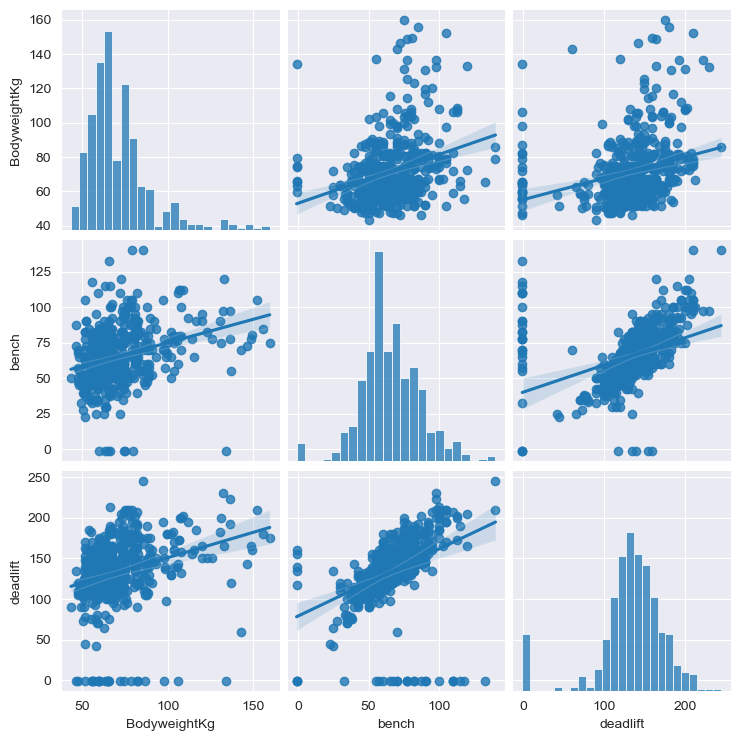

In [23]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_regr[["BodyweightKg", "bench", 'deadlift']][:500], kind="reg")
plt.show()

In [24]:
X = df_regr[["squat", "Age", "Equipment", "Tested", "bench", 'deadlift']].to_numpy()
# y - вес спортсмена
y = df_regr['BodyweightKg'].to_numpy()

In [25]:
res = sm.OLS(y, X).fit()
print(f"MSE: {res.mse_resid}")
print(f"RMSE: {np.sqrt(res.mse_resid)}")
print(f"R2 из модуля statsmodels: {(res.rsquared)}")
print(f"R2 из модуля sk-learn: {(r2_score(y, res.predict()))}")

y_pred = res.predict()
print(f"MAE: {mean_absolute_error(y, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y, y_pred)}")

MSE: 475.27433299611585
RMSE: 21.80078743981776
R2 из модуля statsmodels: 0.9026199244140566
R2 из модуля sk-learn: -0.31617622616864827
MAE: 16.53009332352011
MAPE: 0.8257217677949196


In [26]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  model = LinearRegression()
  model.fit(X_train, y_train)
  acc = r2_score(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(f"R2 среднее: {np.mean(mean_acc)}")

R2 среднее: 0.06115533467165744


# Задание 2
Попробовать исключить все пропущенные данные из набора и решить на них задачу регрессии на любой целевой переменной и попробовать различные методы нормализации/стандартизации данных (MinMaxScaler, RobustScaler, StandardScaler)
Строить регрессию как на всех данных целиком с помощью statsmodels, так и с помощью кросс-валидации и пакета sklearn (встроенная модель LinearRegression) (попробовать оба варианта)

## Нормализация данных различными методами

### MinMaxScaler

In [27]:
df = df_regr.copy(deep=True)

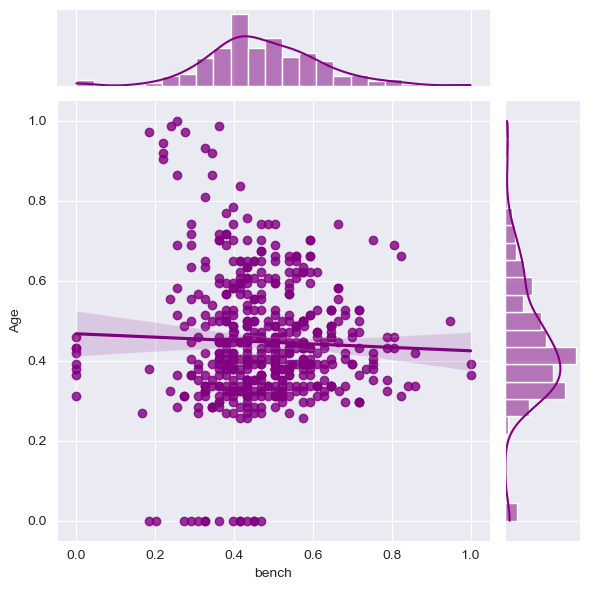

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[:500])
df_regr = pd.DataFrame(data=scaler.fit_transform(df[:500]), columns=df.columns)
sns.jointplot(data=df_regr,x='bench',y='Age',kind='reg',color="Purple")
plt.show()

In [29]:
X = df_regr[["squat", "Age", "Equipment", "Tested", "bench", 'deadlift']].to_numpy()
# y - вес спортсмена
y = df_regr['BodyweightKg'].to_numpy()

In [30]:
res = sm.OLS(y, X).fit()
print(f"MSE: {res.mse_resid}")
print(f"RMSE: {np.sqrt(res.mse_resid)}")
print(f"R2 из модуля statsmodels: {(res.rsquared)}")
print(f"R2 из модуля sk-learn: {(r2_score(y, res.predict()))}")

y_pred = res.predict()
print(f"MAE: {mean_absolute_error(y, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y, y_pred)}")

MSE: 0.0226455358414608
RMSE: 0.15048433752873022
R2 из модуля statsmodels: 0.7418065725643966
R2 из модуля sk-learn: 0.16969647834985813
MAE: 0.10573315584156362
MAPE: 1405129153005.376


In [31]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  model = LinearRegression()
  model.fit(X_train, y_train)
  acc = r2_score(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(f"R2 среднее: {np.mean(mean_acc)}")

R2 среднее: -0.02505469624764156


### StandardScaler

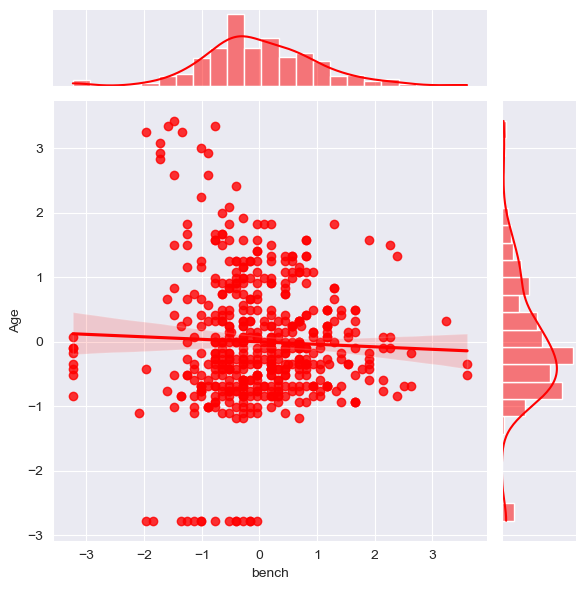

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[:500])
df_regr = pd.DataFrame(data=scaler.fit_transform(df[:500]), columns=df.columns)
sns.jointplot(data=df_regr,x='bench',y='Age',kind='reg',color="Red")
plt.show()

In [33]:
X = df_regr[["squat", "Age", "Equipment", "Tested", "bench", 'deadlift']].to_numpy()
# y - вес спортсмена
y = df_regr['BodyweightKg'].to_numpy()

In [34]:
res = sm.OLS(y, X).fit()
print(f"MSE: {res.mse_resid}")
print(f"RMSE: {np.sqrt(res.mse_resid)}")
print(f"R2 из модуля statsmodels: {(res.rsquared)}")
print(f"R2 из модуля sk-learn: {(r2_score(y, res.predict()))}")

y_pred = res.predict()
print(f"MAE: {mean_absolute_error(y, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y, y_pred)}")

MSE: 0.8338190949691396
RMSE: 0.9131369530191732
R2 из модуля statsmodels: 0.1745190959805516
R2 из модуля sk-learn: 0.17451909598055182
MAE: 0.6415391241681525
MAPE: 4.720207543655


In [35]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  model = LinearRegression()
  model.fit(X_train, y_train)
  acc = r2_score(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(f"R2 среднее: {np.mean(mean_acc)}")

R2 среднее: -0.025054696247643025


### RobustScaler

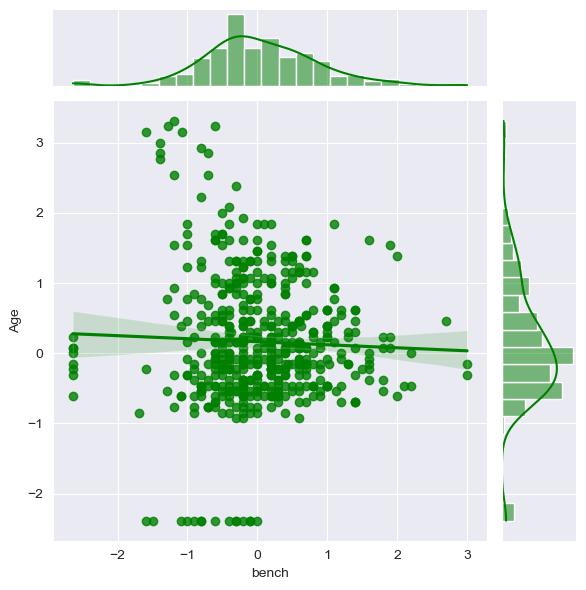

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df[:500])
df_regr = pd.DataFrame(data=scaler.fit_transform(df[:500]), columns=df.columns)
sns.jointplot(data=df_regr,x='bench',y='Age',kind='reg',color="Green")
plt.show()

In [37]:
X = df_regr[["squat", "Age", "Equipment", "Tested", "bench", 'deadlift']].to_numpy()
# y - вес спортсмена
y = df_regr['BodyweightKg'].to_numpy()

In [38]:
res = sm.OLS(y, X).fit()
print(f"MSE: {res.mse_resid}")
print(f"RMSE: {np.sqrt(res.mse_resid)}")
print(f"R2 из модуля statsmodels: {(res.rsquared)}")
print(f"R2 из модуля sk-learn: {(r2_score(y, res.predict()))}")

y_pred = res.predict()
print(f"MAE: {mean_absolute_error(y, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y, y_pred)}")

MSE: 0.8154108730514203
RMSE: 0.9030010371264368
R2 из модуля statsmodels: 0.21035109348640246
R2 из модуля sk-learn: 0.1613036400618355
MAE: 0.6214974648060558
MAPE: 5.771707728697838


In [39]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  model = LinearRegression()
  model.fit(X_train, y_train)
  acc = r2_score(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(f"R2 среднее: {np.mean(mean_acc)}")

R2 среднее: -0.025054696247643116


Вывод: лучше всего себя показал StandardScaler, обучаюшийся с помощью statsmodels (r2 = 0,174)